In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import datetime
import pickle
import calendar
from folium.plugins import HeatMapWithTime
import seaborn as sns
import numpy as np
import gmplot

#import geopy
#import usaddress
#import reverse_geocoder as rg 
#import pprint 

In [2]:
#set .head() to show all columns and rows if run

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Formatting

Only used during first loading of data to make the raw data more user-friendly

In [3]:
#data['Call Received'] = pd.to_datetime(data['Call Received'])

In [4]:
#data.info()

In [5]:
#rename
#data = data.rename({'Event Number': 'event_num', 'Call Received': 'call_re', 'Complaint Number' : 'comp_num', 'Shift':'shift', 'Tencode':'tc', 'Tencode Description':'tc_desc', 'Tencode Suffix':'tc_suff', 'Tencode Suffix Description':'tc_suff_desc','Disposition Code':'disp_code', 'Disposition Description':'disp_desc','Block':'block','Street Name':'st_name','Unit Dispatched':'unit_disp','Sector':'sect','Zone':'zone','RPA':'rpa','Latitude':'lat','Longitude':'long','Mapped Location':'map_loc'}, axis=1)

In [6]:
#data['month'] = pd.DatetimeIndex(data['call_re']).month
#data['day'] = pd.DatetimeIndex(data['call_re']).day

In [7]:
#rename
#data = data.rename({'Event Number': 'event_num', 'Call Received': 'call_re', 'Complaint Number' : 'comp_num', 'Shift':'shift', 'Tencode':'tc', 'Tencode Description':'tc_desc', 'Tencode Suffix':'tc_suff', 'Tencode Suffix Description':'tc_suff_desc','Disposition Code':'disp_code', 'Disposition Description':'disp_desc','Block':'block','Street Name':'st_name','Unit Dispatched':'unit_disp','Sector':'sect','Zone':'zone','RPA':'rpa','Latitude':'lat','Longitude':'long','Mapped Location':'map_loc','geometry':'geo','index_right':'ind_r'}, axis=1)

In [8]:
# Create column to identify if incident location is in TN

#outers = [34.153, 0, -2.283]
#data['in_state'] = np.where(data.lat.isin(outers), False, True)

# Note: Loading raw data for 2013 - 2017 shows three popular locations recorded that are outside of TN with unique latitudes listed in the outers array.

In [9]:
#to avoid having to recreate and reload info
#data = data.to_csv('./data/df_2013_formatted_with_zip.csv', index = False)

## Load Formatted Crime Data

In [10]:
data = pd.read_csv('./data/df_2015_formatted_with_zip.csv')

In [11]:
data.shape

(1172138, 24)

In [12]:
data.head()

,index_left,zip,event_num,call_re,comp_num,shift,tc,tc_desc,tc_suff,tc_suff_desc,disp_code,disp_desc,block,st_name,unit_disp,sect,zone,rpa,lat,Longitude,map_loc,month,day,geometry
0,0.0,37115.0,PD201500069314,2015-01-19 06:57:00,20150062963,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,1500.0,GALLATIN PKE S,721A,M,11.0,1509.0,36.239,-86.724,"(36.239, -86.724)",1,19,POINT (-86.72399999999998 36.239)
1,0.0,37115.0,PD201500364950,2015-04-08 04:30:00,20150327869,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,200.0,MENEES LN,711C,M,13.0,1621.0,36.217,-86.647,"(36.217, -86.647)",4,8,POINT (-86.64700000000001 36.217)
2,0.0,37115.0,PD201500517383,2015-05-16 21:23:00,20150462255,B,40,Suspicious Person,TS,TERRY STOP,3,CITATION - TRAFFIC,200.0,MENEES LN,3866,M,13.0,1621.0,36.217,-86.647,"(36.217, -86.647)",5,16,POINT (-86.64700000000001 36.217)
3,0.0,37115.0,PD201500168042,2015-02-13 13:40:00,20150152506,A,43,Want Officer for Investigation / Assistance,P,PROGRESS,4,ASSISTED CITIZEN,200.0,MENEES LN,2S54,M,13.0,1621.0,36.217,-86.647,"(36.217, -86.647)",2,13,POINT (-86.64700000000001 36.217)
4,0.0,37115.0,PD201500369294,2015-04-09 03:47:00,20150331722,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,200.0,MENEES LN,711C,M,13.0,1621.0,36.217,-86.647,"(36.217, -86.647)",4,9,POINT (-86.64700000000001 36.217)


In [13]:
data.tail()

,index_left,zip,event_num,call_re,comp_num,shift,tc,tc_desc,tc_suff,tc_suff_desc,disp_code,disp_desc,block,st_name,unit_disp,sect,zone,rpa,lat,Longitude,map_loc,month,day,geometry
1172133,NaN,NaN,PD201501350446,2015-12-31 17:47:00,20151188797,B,43,Want Officer for Investigation / Assistance,P,PROGRESS,6,ASSISTED OTHER UNIT,NaN,HARPERS MILL RD,5D51C,NaN,NaN,NaN,NaN,NaN,NaN,12,31,POINT (nan nan)
1172134,NaN,NaN,PD201501350652,2015-12-31 19:16:00,20151188967,B,93,Traffic Violation,NaN,NaN,6,ASSISTED OTHER UNIT,0.0,I65 N&WILLIAMSON CO LINE,813B,MT,33.0,8623.0,36.035,-86.783,"(36.035, -86.783)",12,31,POINT (-86.78299999999999 36.035)
1172135,NaN,NaN,PD201501351165,2015-12-31 22:40:00,20151189373,B,3,Administrative/Special Assignment,O,OTHER (USED BY MNPD),4,ASSISTED CITIZEN,0.0,NEW YEARS EVE BASH,5193,NaN,NaN,0.0,0.000,0.000,"(0.0, 0.0)",12,31,POINT (0 0)
1172136,NaN,NaN,PD201501351171,2015-12-31 22:43:00,20151189375,B,43,Want Officer for Investigation / Assistance,P,PROGRESS,4,ASSISTED CITIZEN,600.0,LAFAC X,423C,NaN,NaN,0.0,NaN,NaN,NaN,12,31,POINT (nan nan)
1172137,NaN,NaN,PD201501351306,2015-12-31 23:46:00,20151189494,NaN,50,Theft,PV,IN PROGRESS SITUATION INVOLVING VEHICLE,6,ASSISTED OTHER UNIT,NaN,BANDYWOOD DR,117C,NaN,NaN,NaN,NaN,NaN,NaN,12,31,POINT (nan nan)


In [14]:
data['call_re'] = pd.to_datetime(data['call_re'])

## Dataframe Info

In [15]:
#data['tc_desc'].value_counts()

In [16]:
#data.info

# Worst Days & Weeks

## Incidents by Day

Text(0, 0.5, 'Number of Incidents')

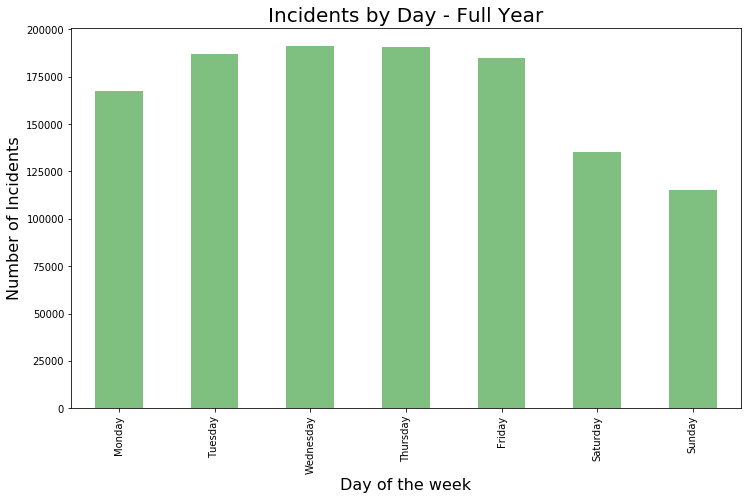

In [17]:
# Number of incidents per day of the week
day_incidents1 = data.groupby(data['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents1.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img1 = day_incidents1.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5)

# title and x,y labels
plt.title('Incidents by Day - Full Year', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

## Incidents by Day per Month

Text(0, 0.5, 'Number of Incidents')

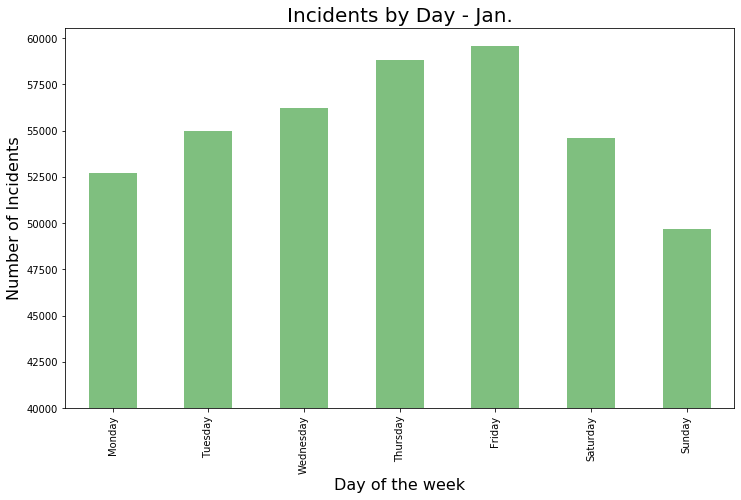

In [18]:
jan = data[data.month == 1]

# Number of incidents per day of the week
day_incidents = jan.groupby(jan['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Jan.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

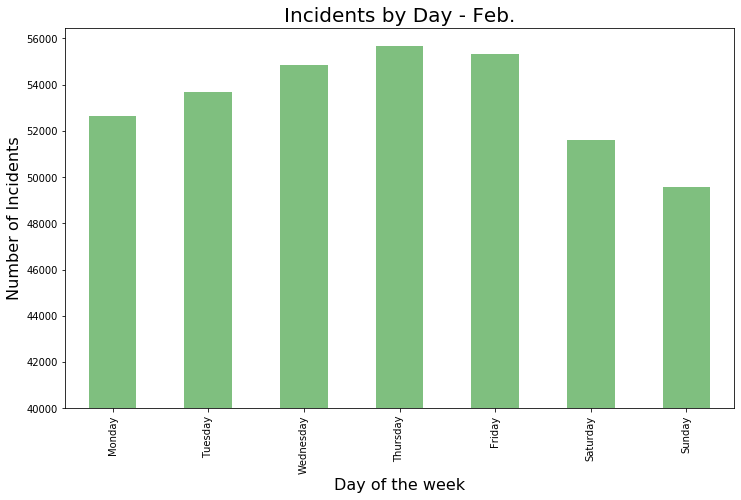

In [19]:
feb = data[data.month == 2]

# Number of incidents per day of the week
day_incidents = feb.groupby(feb['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Feb.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

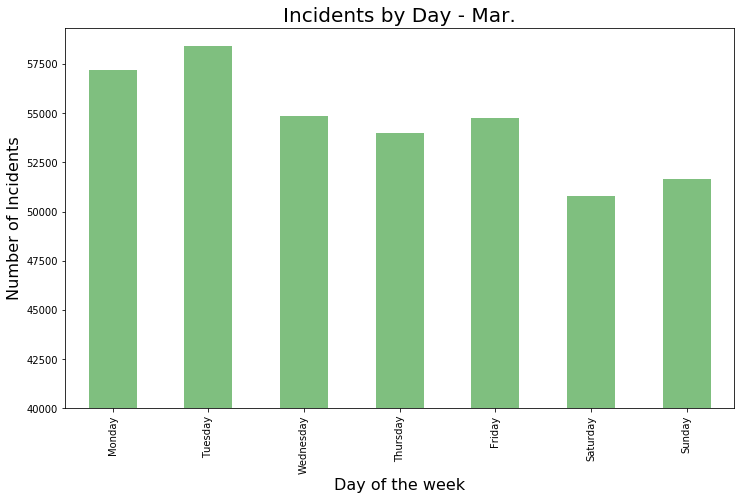

In [20]:
mar = data[data.month == 3]

# Number of incidents per day of the week
day_incidents = mar.groupby(mar['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Mar.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

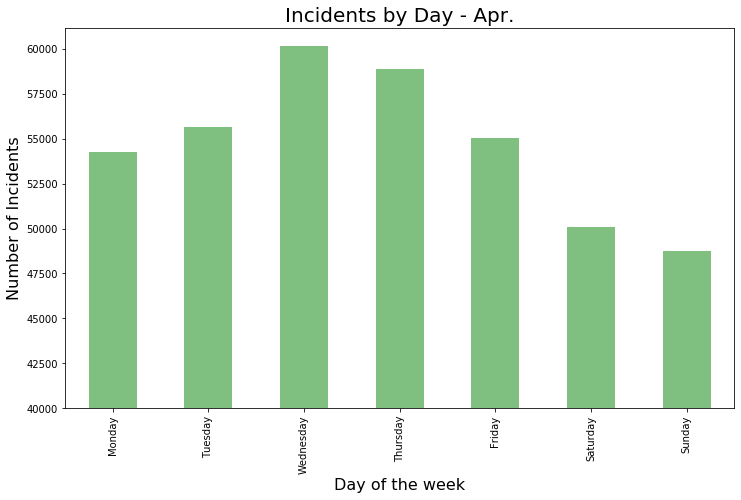

In [21]:
apr = data[data.month == 4]

# Number of incidents per day of the week
day_incidents = apr.groupby(apr['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Apr.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

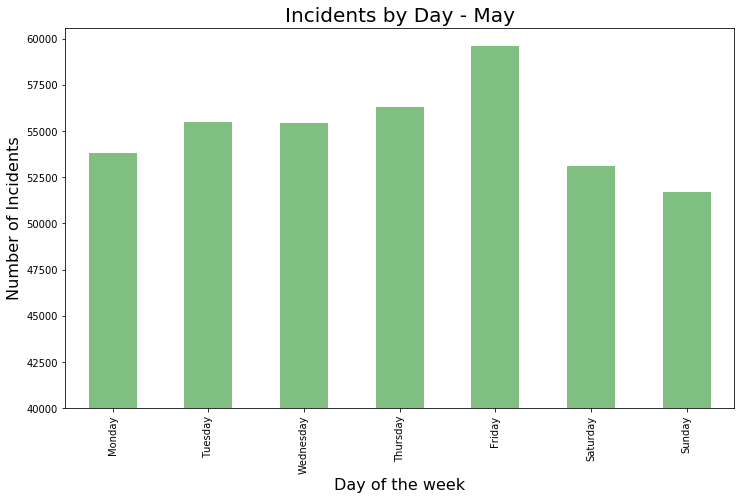

In [22]:
may = data[data.month == 5]

# Number of incidents per day of the week
day_incidents = may.groupby(may['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - May', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

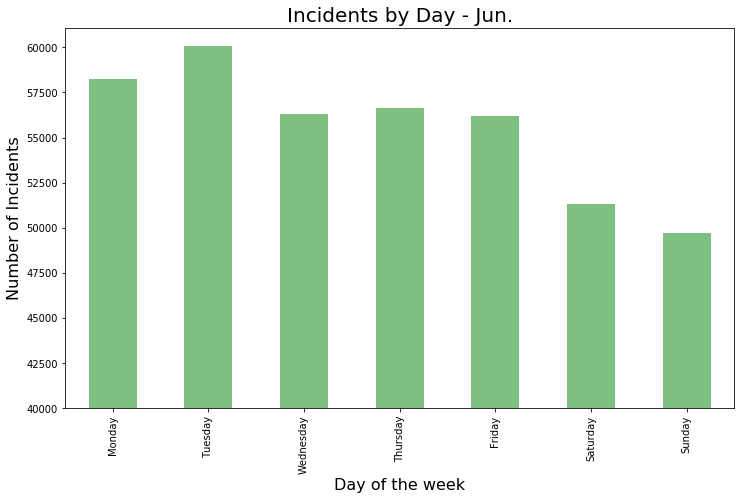

In [23]:
jun = data[data.month == 6]

# Number of incidents per day of the week
day_incidents = jun.groupby(jun['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Jun.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

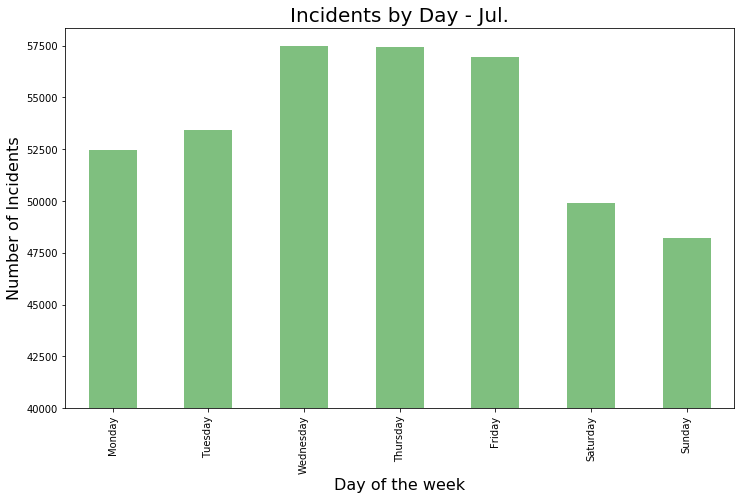

In [24]:
jul = data[data.month == 7]

# Number of incidents per day of the week
day_incidents = jul.groupby(jul['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Jul.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

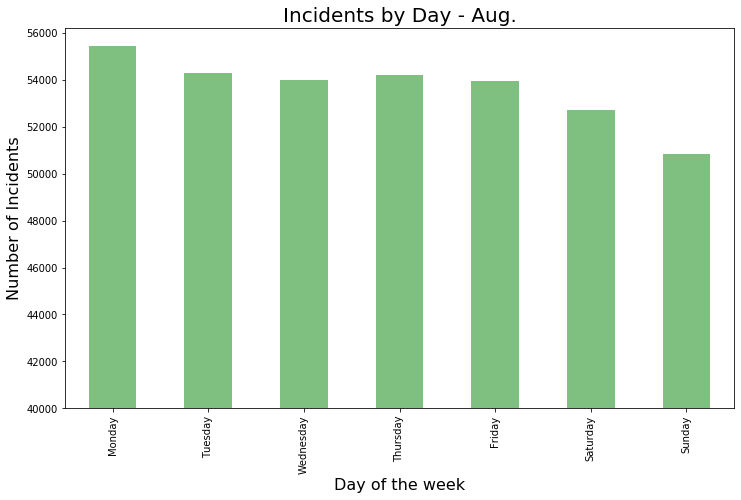

In [25]:
aug = data[data.month == 8]

# Number of incidents per day of the week
day_incidents = aug.groupby(aug['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Aug.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

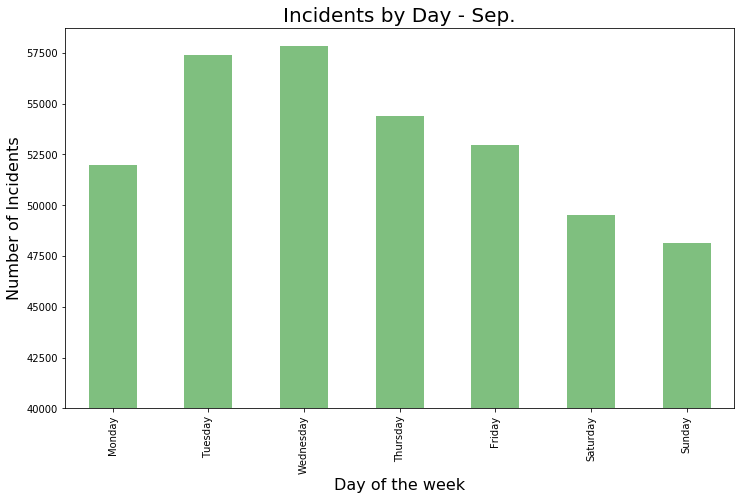

In [26]:
sep = data[data.month == 9]

# Number of incidents per day of the week
day_incidents = sep.groupby(sep['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Sep.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

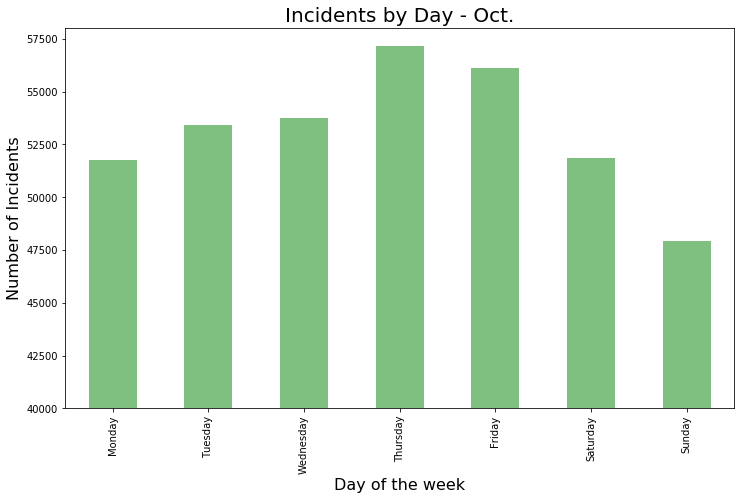

In [27]:
octo = data[data.month == 10]

# Number of incidents per day of the week
day_incidents = octo.groupby(octo['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Oct.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

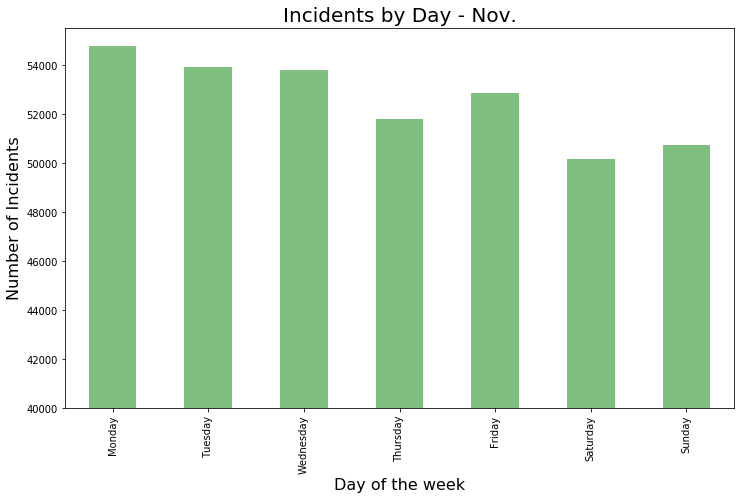

In [28]:
nov = data[data.month == 11]

# Number of incidents per day of the week
day_incidents = nov.groupby(nov['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Nov.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

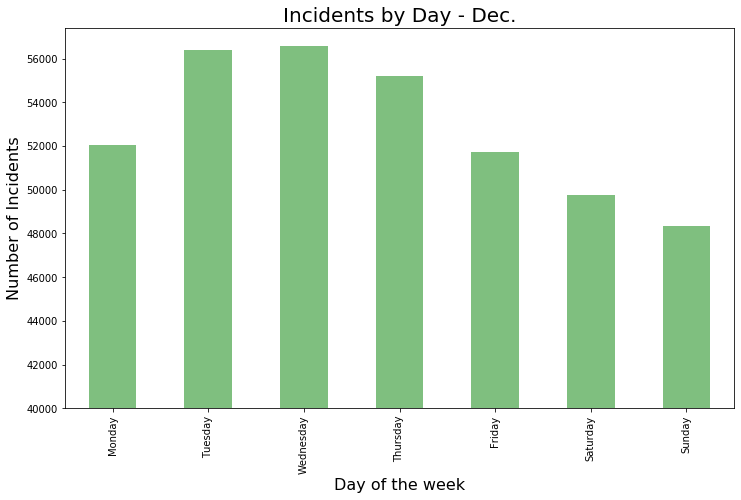

In [29]:
dec = data[data.month == 12]

# Number of incidents per day of the week
day_incidents = dec.groupby(dec['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Dec.', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

## Incidents by Quarter

In [30]:
q1 =[jan, feb, mar]
q2 = [apr, may, jun]
q3 = [jul, aug, sep]
q4 = [octo, nov, dec]

qt1 = pd.concat(q1)
qt2 = pd.concat(q2)
qt3 = pd.concat(q3)
qt4 = pd.concat(q4)

In [31]:
q1ct = qt1['comp_num'].count()
q2ct = qt2['comp_num'].count()
q3ct = qt3['comp_num'].count()
q4ct = qt4['comp_num'].count()

qtr_cts=[q1ct, q2ct, q3ct, q4ct]

qtr = ['Q1','Q2','Q3','Q4']

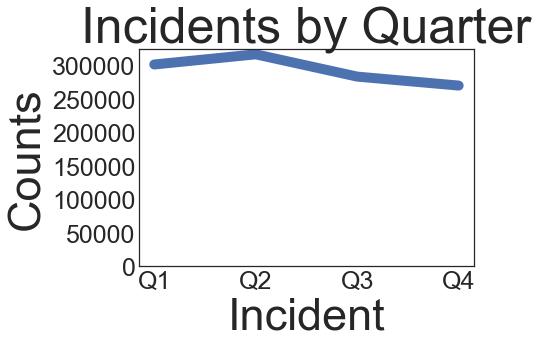

In [32]:
sns.set(rc={"lines.linewidth": 10.0})
plt.style.use('seaborn-white')

g = sns.lineplot(x = qtr ,y = qtr_cts, ci = None, alpha = 1)
plt.xticks(rotation=0, fontsize = 25)
plt.yticks(rotation=0, fontsize = 25)
plt.ylim(0,325000)
sns.set_style("white")

#sns.set(rc={'figure.figsize':(22, 22)})
plt.title("Incidents by Quarter", fontsize = 50)
plt.xlabel("Incident", fontsize = 45)
plt.ylabel("Counts", fontsize = 45)
plt.show()

## Incidents by Week

In [33]:
# Number of incidents per week
wk_incidents = data.groupby(data['call_re'].dt.week).count().call_re

print(wk_incidents)

call_re
1     11388
2     25555
3     24050
4     24598
5     23211
6     24384
7     24504
8     20260
9     24352
10    22208
11    23882
12    22517
13    23861
14    22702
15    22978
16    24631
17    24636
18    23309
19    24788
20    23982
21    23579
22    24570
23    25674
24    25331
25    25094
26    24557
27    22946
28    21658
29    21635
30    21100
31    20927
32    21292
33    21649
34    22809
35    22159
36    21780
37    20487
38    21201
39    21830
40    20993
41    21093
42    20638
43    20723
44    20543
45    20472
46    21181
47    21619
48    19982
49    20752
50    21928
51    22538
52    16226
53    11376
Name: call_re, dtype: int64


In [36]:
wk_ct = pd.DataFrame(list(wk_incidents.items()))

In [37]:
s = pd.Series([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,
35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53])

wk_ct.columns = ['Week', 'Count']
wk_ct.set_index([s])

,Week,Count
1,1,11388
2,2,25555
3,3,24050
4,4,24598
5,5,23211
6,6,24384
7,7,24504
8,8,20260
9,9,24352
10,10,22208


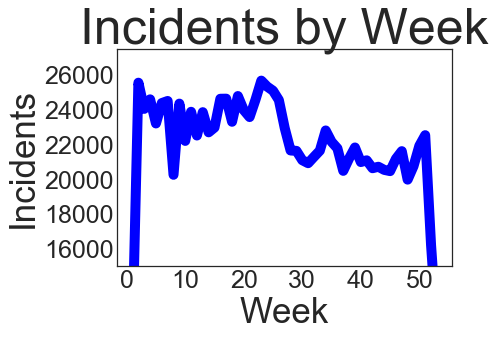

In [38]:
plt.ylim(15000, 27500)

sns.set(rc={"lines.linewidth": 10.0})

g = sns.lineplot(x = "Week",y = "Count", data = wk_ct, ci = None, color = 'blue', alpha = 1)
plt.xticks(rotation=0, fontsize = 25)
plt.yticks(rotation=0, fontsize = 25)

sns.set_style("white")
plt.style.use('seaborn-white')
plt.title("Incidents by Week", fontsize = 50)
plt.xlabel("Week", fontsize = 35)
plt.ylabel("Incidents", fontsize = 35)
plt.show()

Text(0, 0.5, 'Number of Incidents')

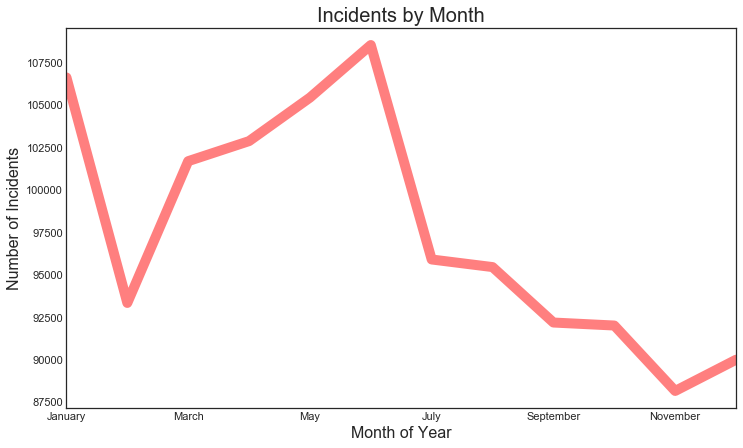

In [39]:
# Number of incidents per Month
mth_incidents = data.groupby(data['call_re'].dt.month).count().call_re

# Replace the month integers by Month names.
mth_incidents.index=[calendar.month_name[x] for x in range(1,13)]

# plot incidents per month
Img2 = mth_incidents.plot(figsize=(12,7), color='red', alpha=0.5)

# title and x,y labels
plt.style.use('seaborn-white')
plt.title('Incidents by Month', fontsize=20)
plt.xlabel('Month of Year',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

## Incidents Reported

In [40]:
inc_ct = data.tc_desc.value_counts()

In [41]:

inc_cts = pd.DataFrame(list(inc_ct.items()))
inc_cts.columns = ['Incident', 'Count']

In [42]:
# Largest x number of incidents

t25 = inc_cts.nlargest(10,['Count'])

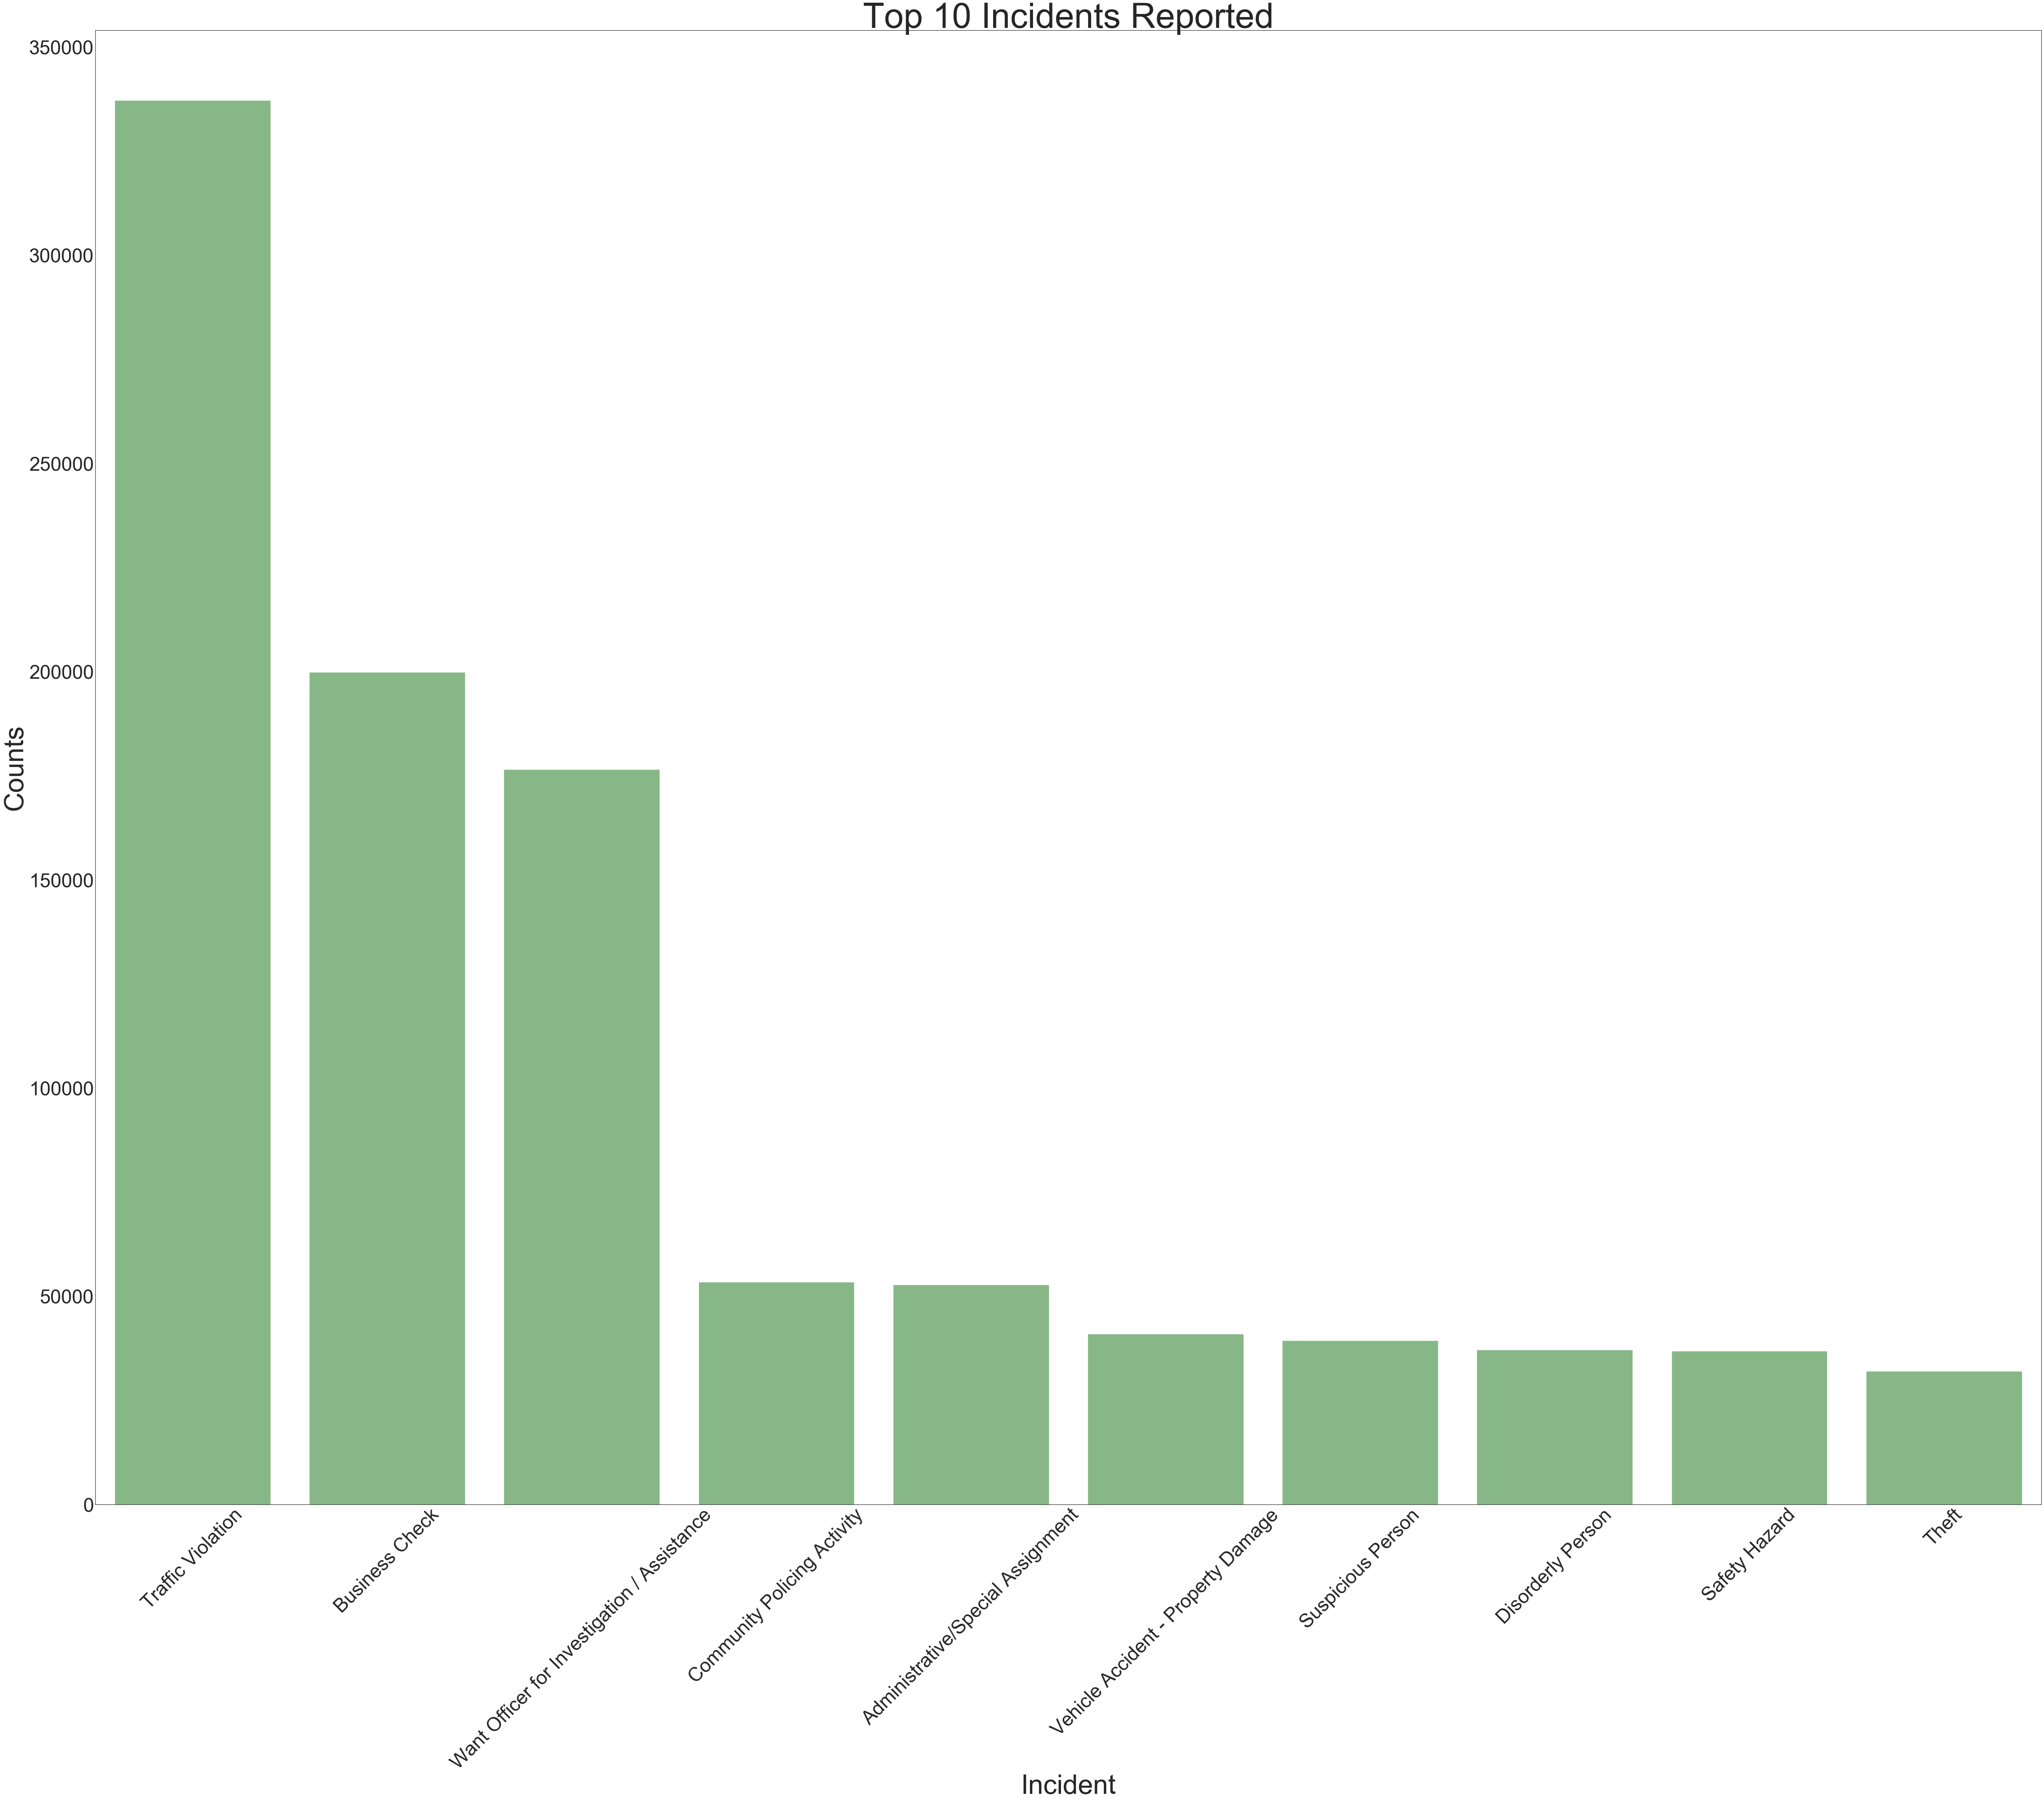

In [64]:
sns.set_style("white")
plt.style.use('seaborn-white')

g = sns.barplot(x = "Incident",y = "Count", data = t25, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=45, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(105, 75)})
plt.title("Top 10 Incidents Reported", fontsize = 90)
plt.xlabel("Incident", fontsize = 70)
plt.ylabel("Counts", fontsize = 70)
plt.show()

In [44]:
# Smallest x number of incidents

S25 = inc_cts.nsmallest(10,['Count'])

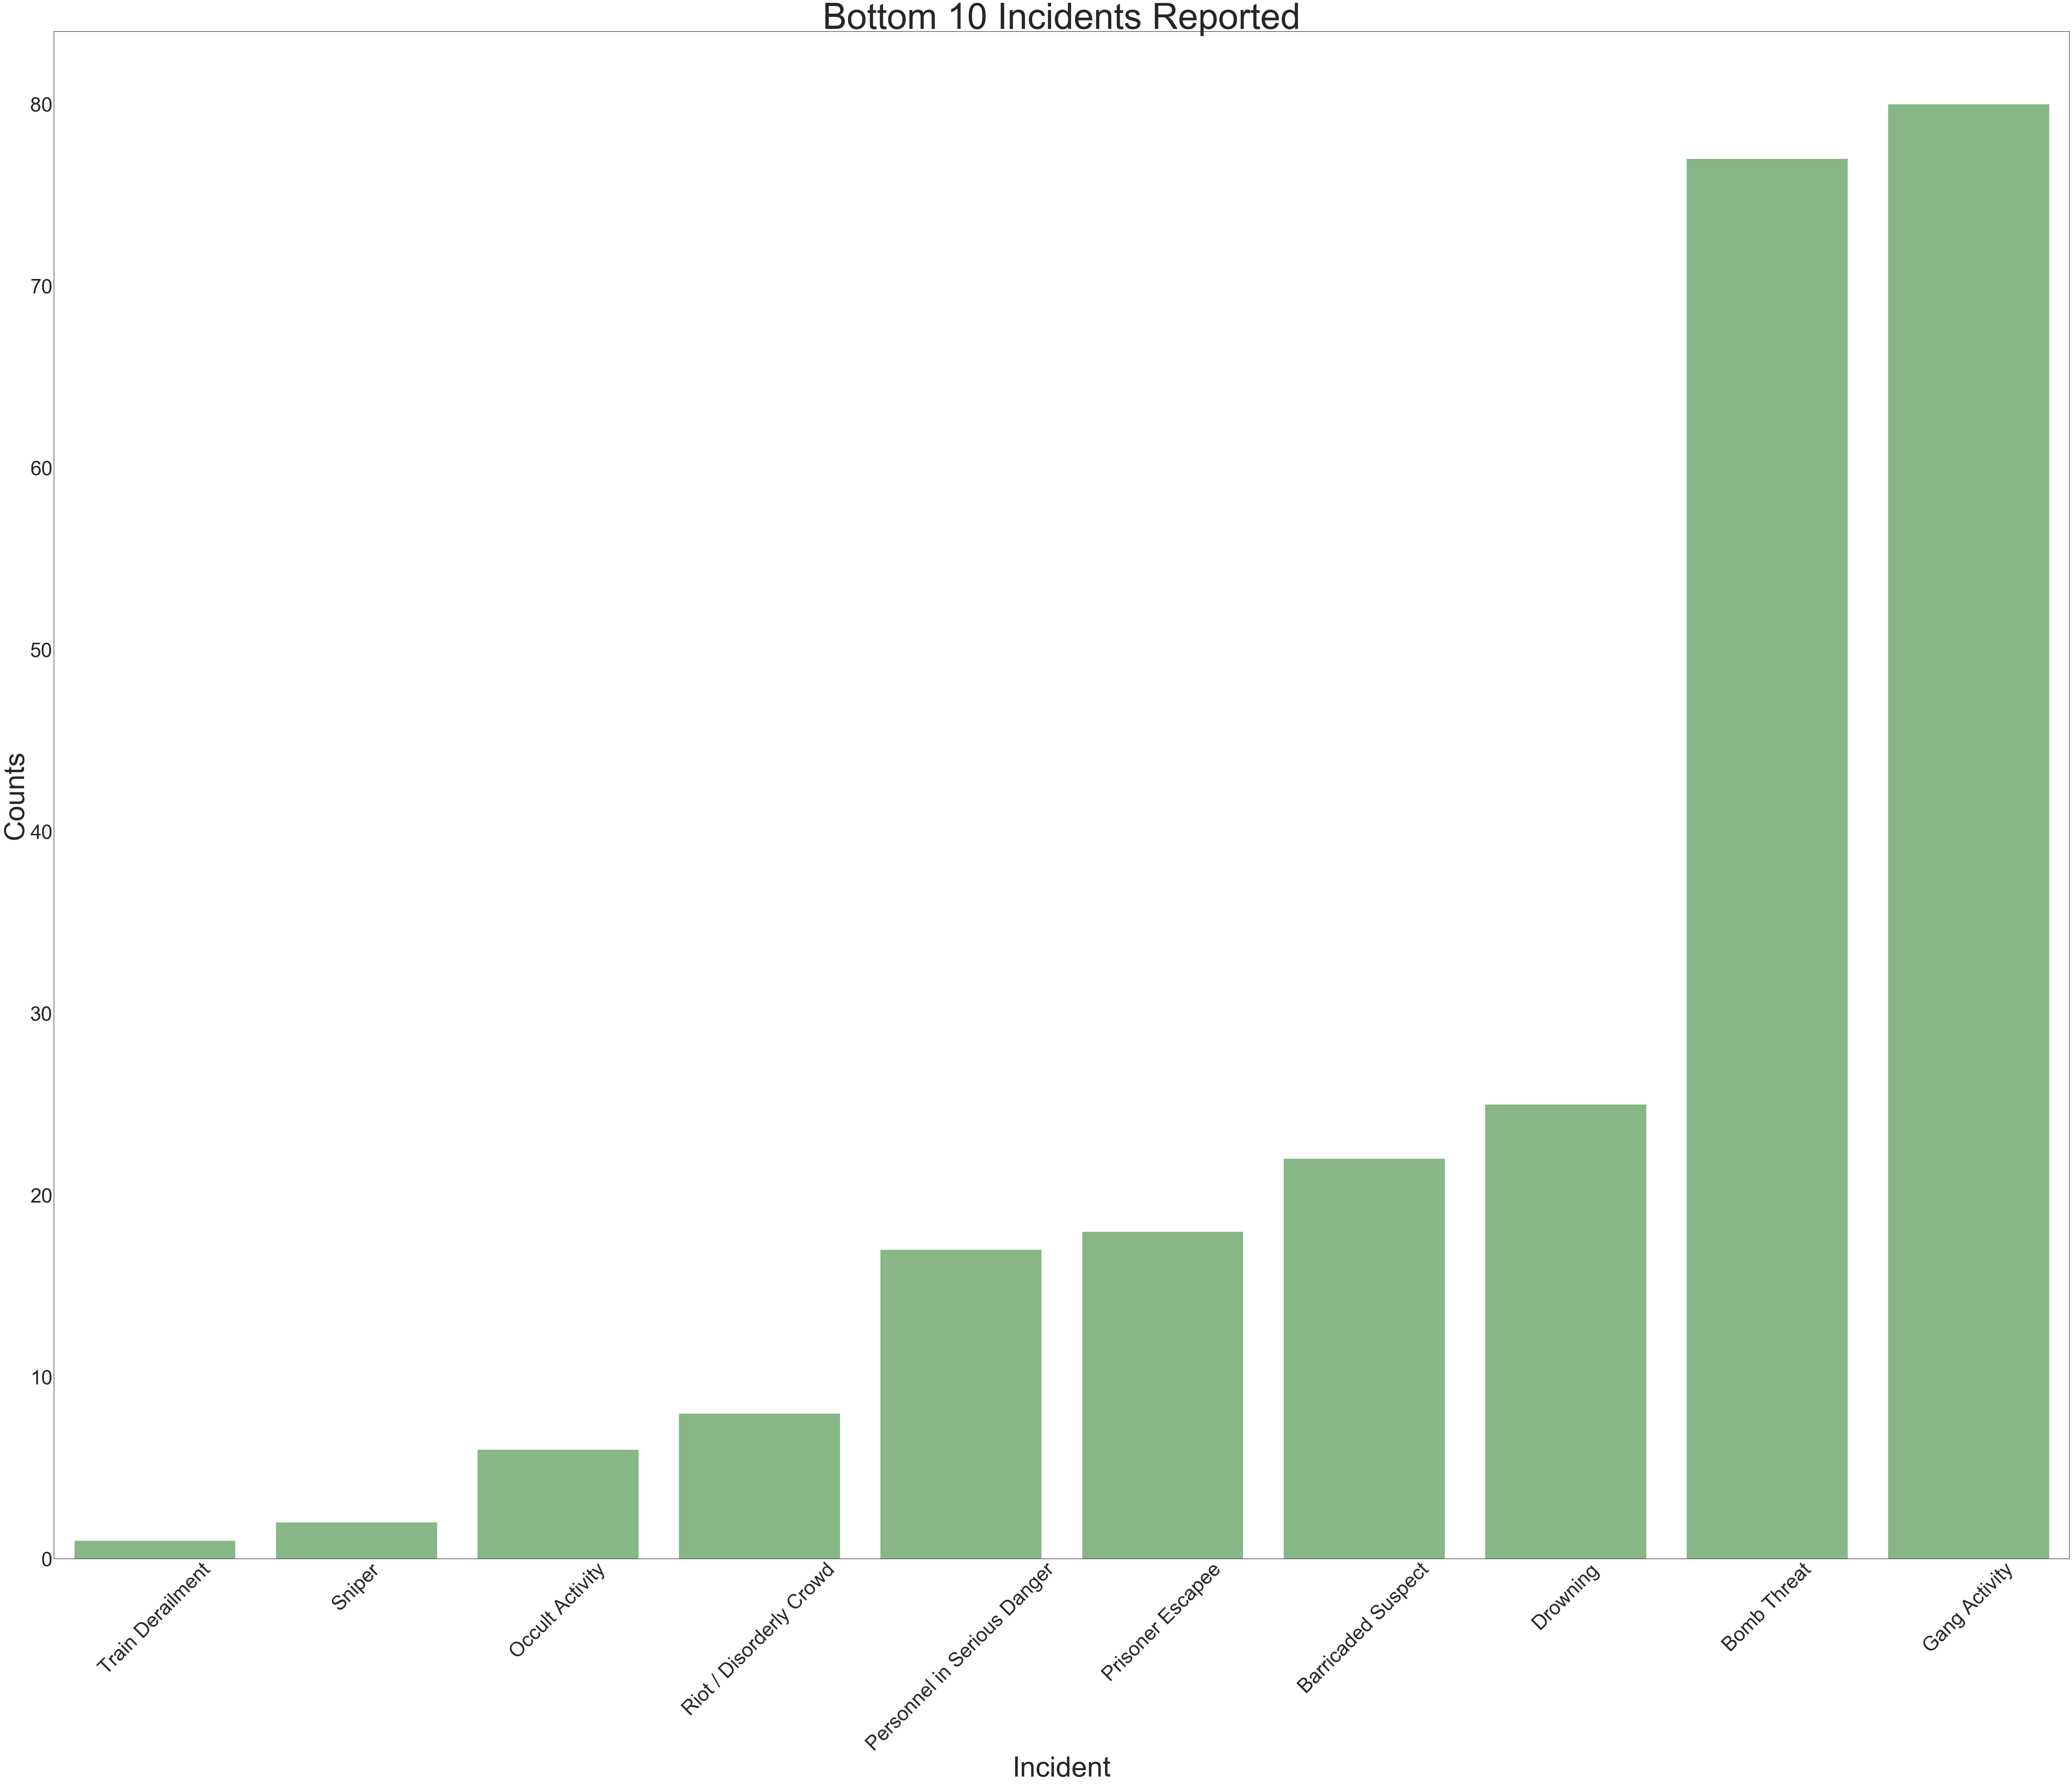

In [45]:
sns.set_style("white")
plt.style.use('seaborn-white')

g = sns.barplot(x = "Incident",y = "Count", data = S25, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=45, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(105, 75)})
plt.title("Bottom 10 Incidents Reported", fontsize = 90)
plt.xlabel("Incident", fontsize = 70)
plt.ylabel("Counts", fontsize = 70)
plt.show()

## Incidents by Zip Code

In [46]:
zip_ct = data.zip.value_counts()

In [47]:
zip_ct.shape

(39,)

In [48]:
zip_cts = pd.DataFrame(list(zip_ct.items()))
zip_cts.columns = ['zip', 'count']

In [49]:
zip_cts.head()

,zip,count
0,37203.0,110328
1,37211.0,103782
2,37207.0,96997
3,37209.0,88938
4,37115.0,81150


In [50]:
# Avg Number of Incidents 

avg_per_zip = zip_cts['count'].mean()
print(avg_per_zip)

29710.384615384617


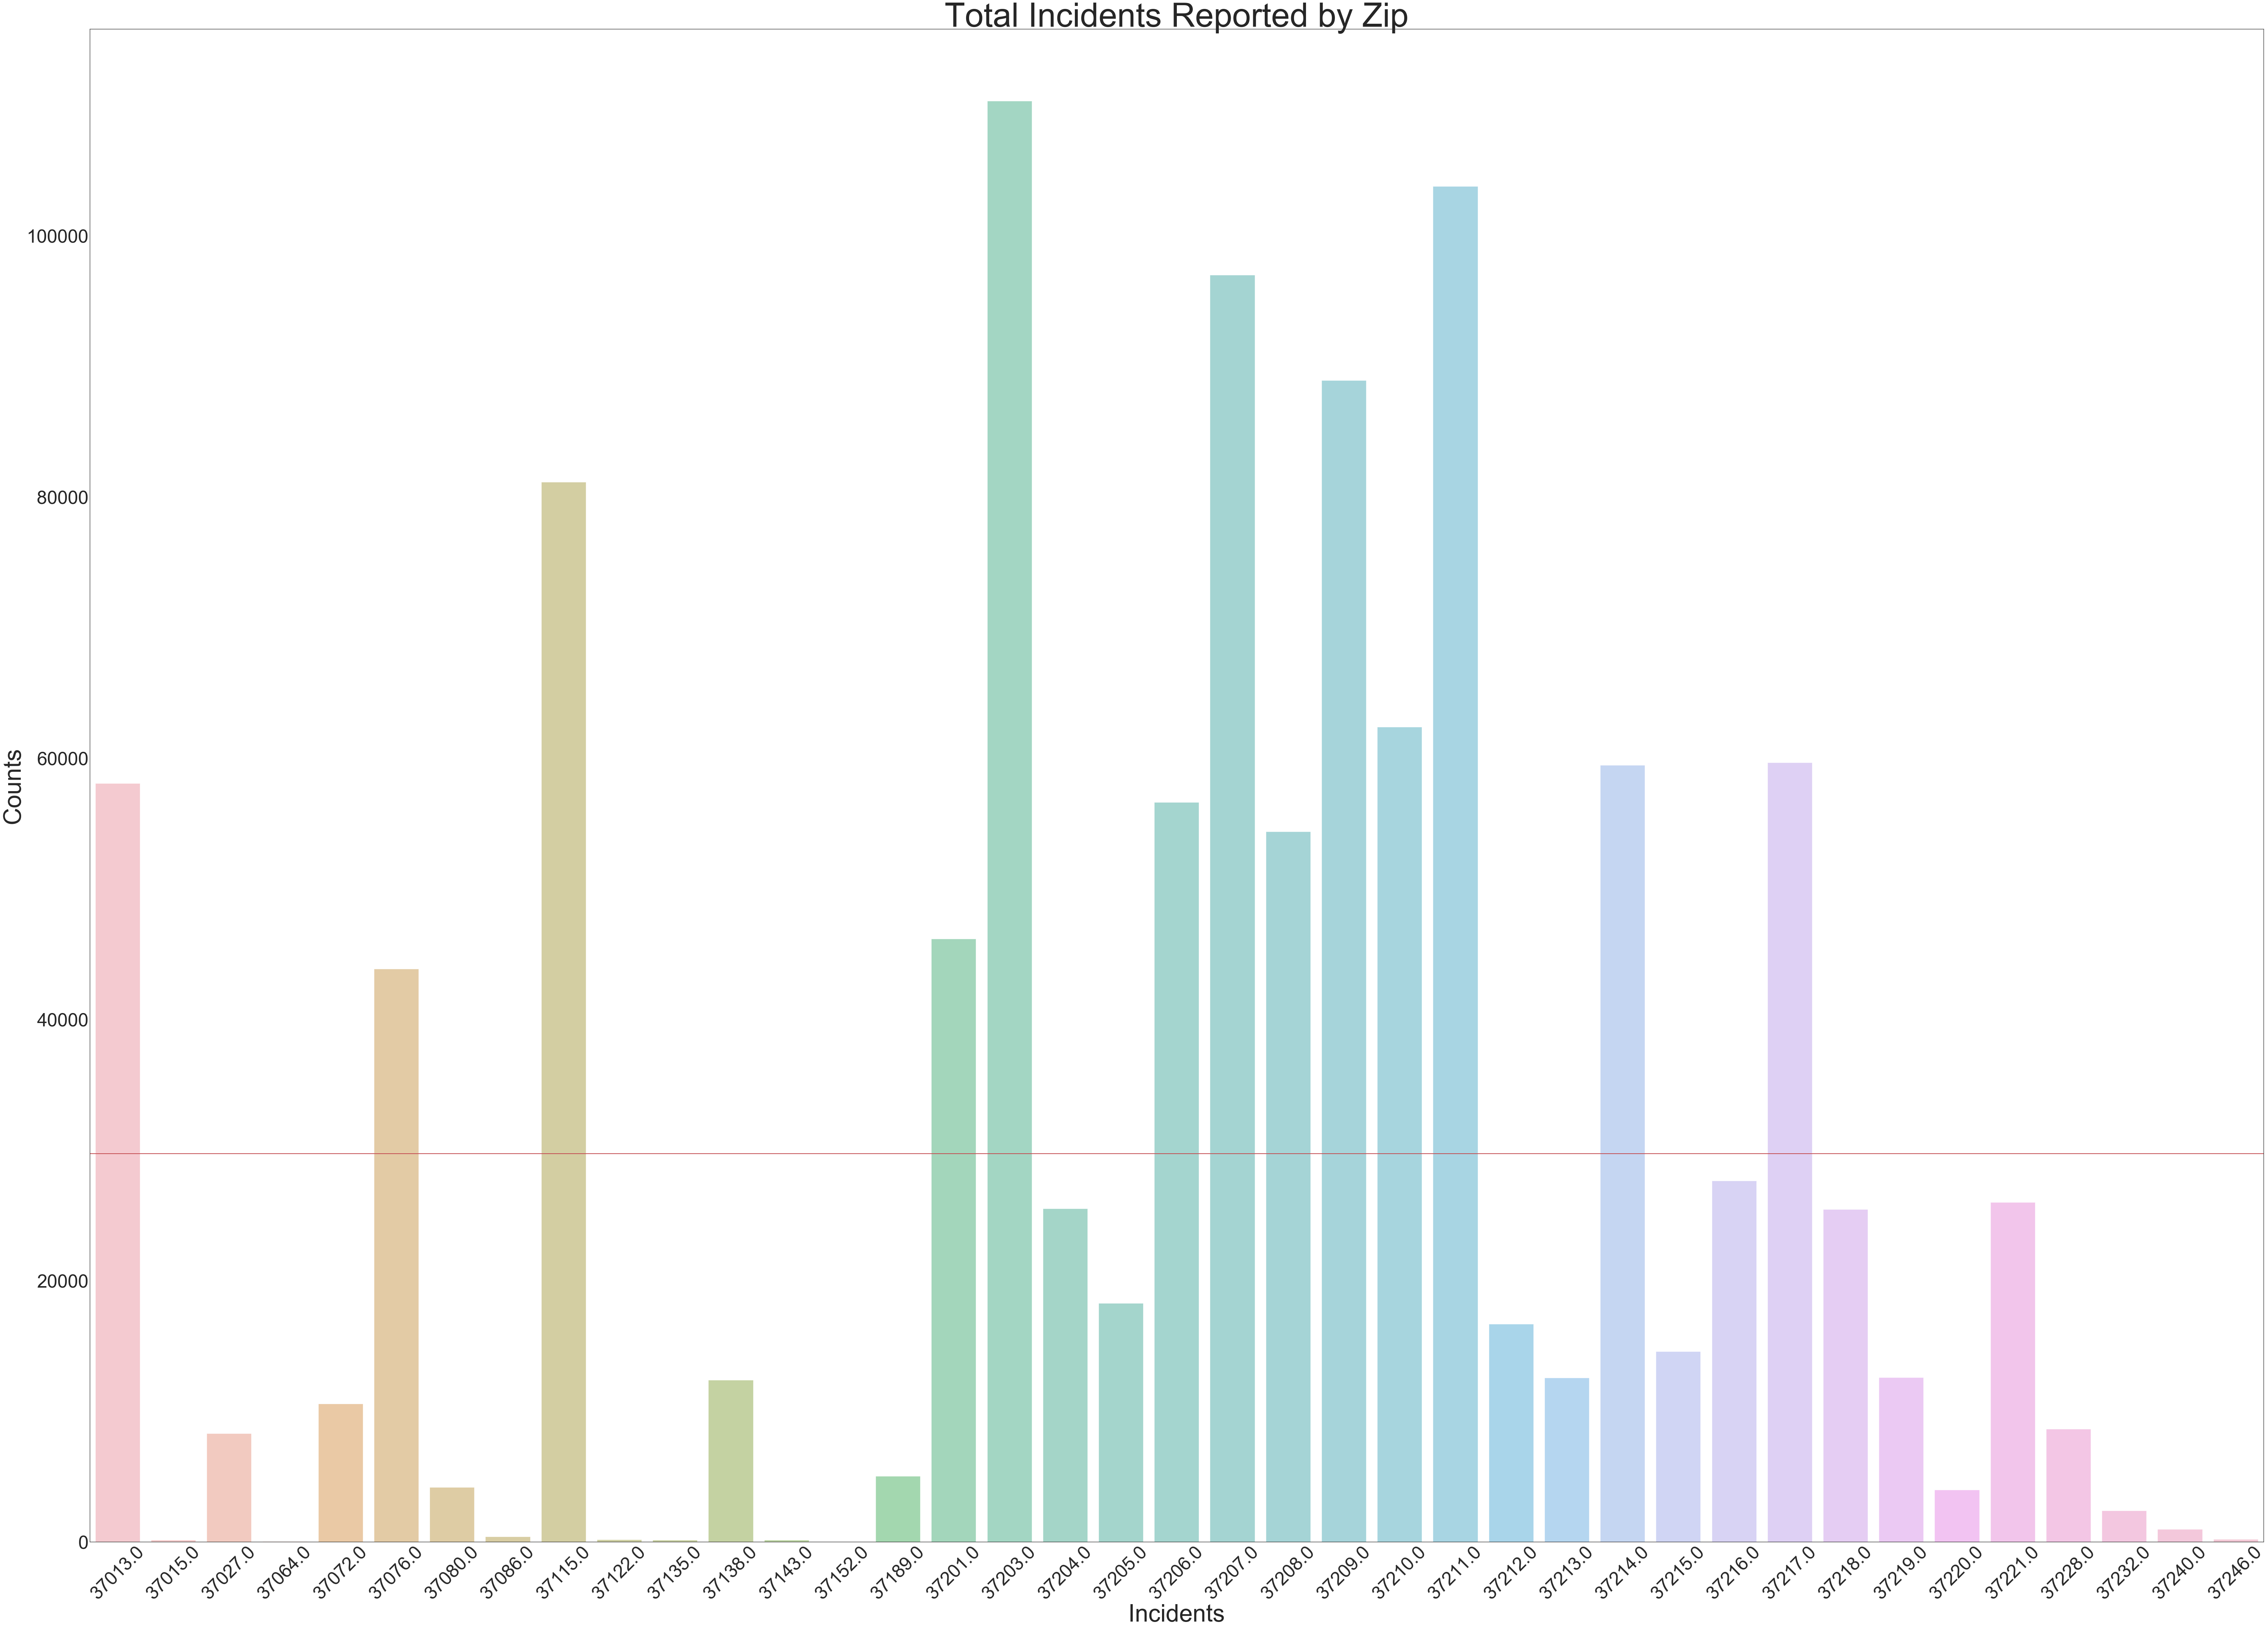

In [51]:
sns.set_style("white")
plt.style.use('seaborn-white')


g = sns.barplot(x = "zip",y = "count", data = zip_cts, ci = None, alpha = 0.5)
line1 = plt.axhline(linewidth=2, color='r', y = avg_per_zip, label = "avg.")
plt.xticks(rotation=45, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(90, 70)})
plt.title("Total Incidents Reported by Zip", fontsize = 90)
plt.xlabel("Incidents", fontsize = 65)
plt.ylabel("Counts", fontsize = 65)
plt.show()

### Import Zip Code Populations

In [52]:
pop_zips = pd.read_csv('./data/tn_zip_population.csv')

In [53]:
pop_zips.head()

,Unnamed: 0,zip_code,y-2016,y-2015,y-2014,y-2013,y-2012,y-2011,y-2010,aggregate
0,11901,37010,5198,5648,5568,5633,5751,5035,4679,37512
1,11902,37012,2424,2637,2766,2477,2436,2355,2292,17387
2,11903,37013,93372,90073,86261,81944,79903,76983,78406,586942
3,11904,37014,2663,2500,2410,2130,1746,1812,1855,15116
4,11905,37015,17996,18361,17846,17400,16985,16976,17184,122748


#### Merge zip_cts to pop_zips

In [54]:
zips_all = zip_cts.merge(pop_zips, how = 'left', left_on = 'zip', right_on = 'zip_code')

In [55]:
# only focus on this year's info

zips_all = zips_all.drop(columns = ['Unnamed: 0','y-2016','y-2014','y-2013','y-2012','y-2011','y-2010','aggregate','zip_code'])

In [56]:
# rename remaining columns for convenience

zips_all = zips_all.rename(index={'zip': 'zip_code', 'count': 'inc_cts', 'y-2014': 'population'})

In [57]:
zips_all.head()

,zip,count,y-2015
0,37203.0,110328,12068.0
1,37211.0,103782,77960.0
2,37207.0,96997,35497.0
3,37209.0,88938,37308.0
4,37115.0,81150,39846.0


#### Calculate crime rate by zipcode

In [58]:
zips_all['crime_rate'] = ((zips_all['count']/zips_all['y-2015'])*100000)

In [59]:
zips_all.head()

,zip,count,y-2015,crime_rate
0,37203.0,110328,12068.0,914219.423268
1,37211.0,103782,77960.0,133122.113905
2,37207.0,96997,35497.0,273254.077809
3,37209.0,88938,37308.0,238388.549373
4,37115.0,81150,39846.0,203659.087487


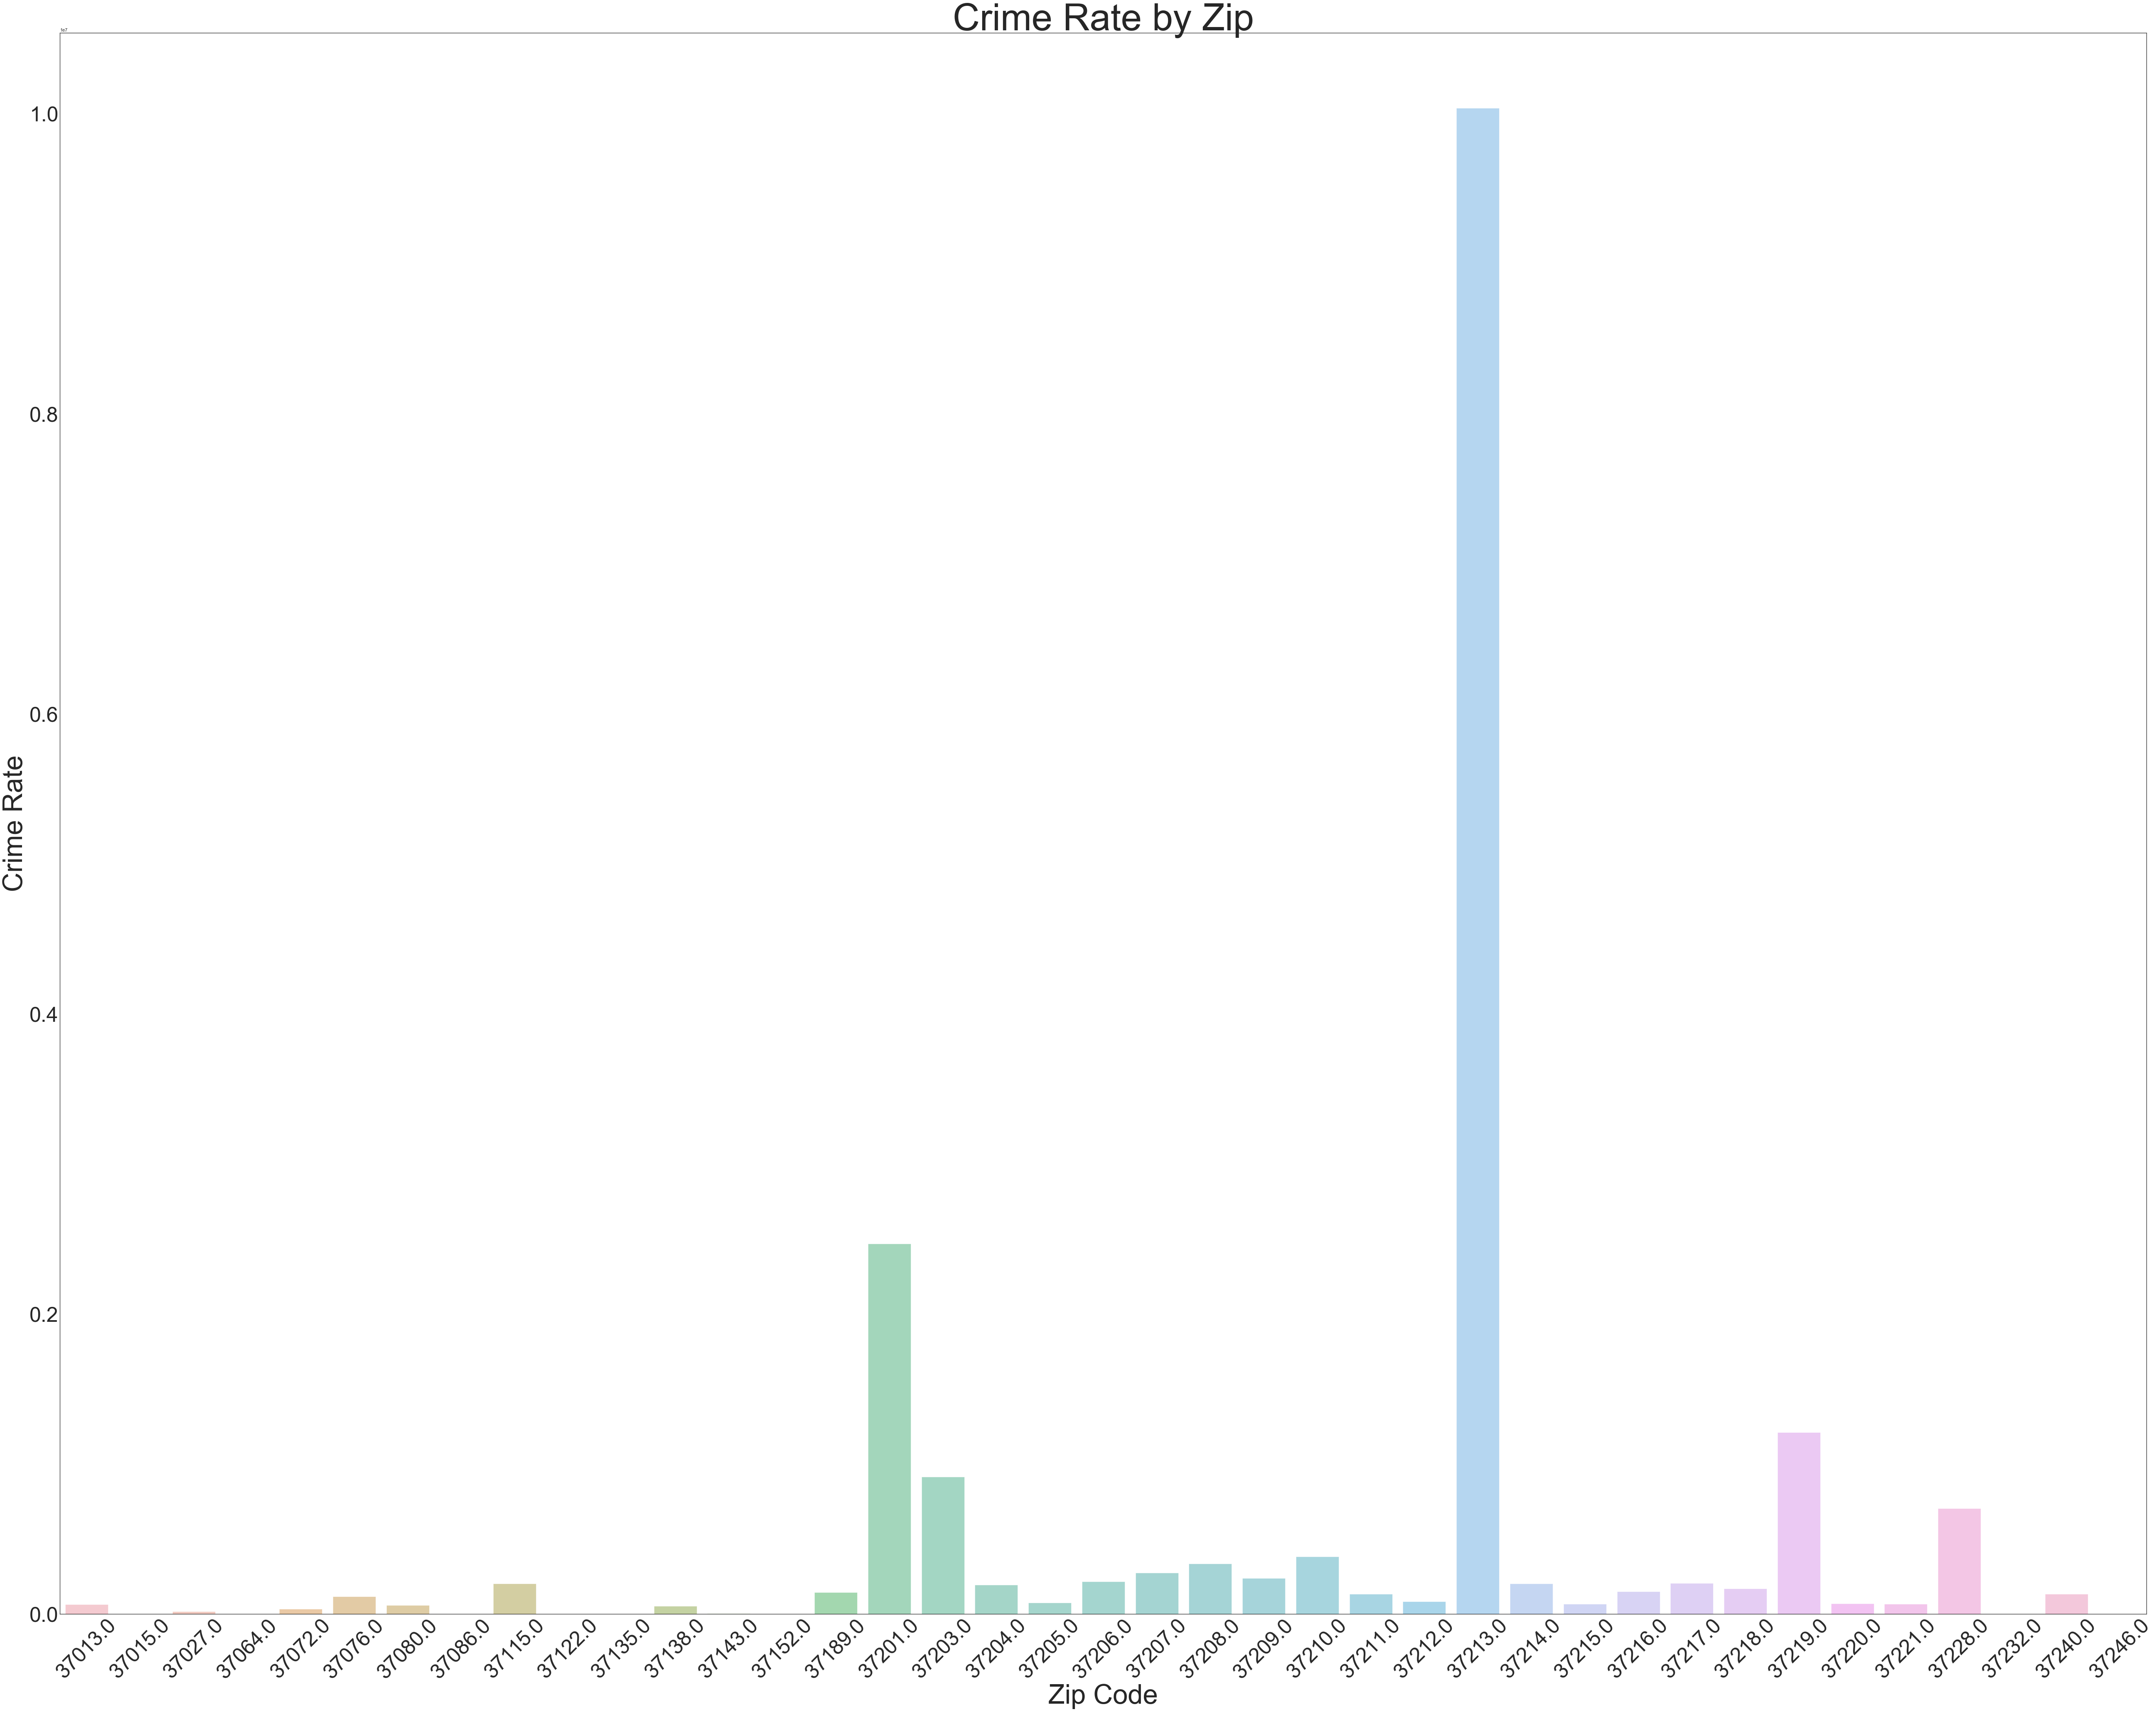

In [60]:
sns.set_style("white")
plt.style.use('seaborn-white')


g = sns.barplot(x = "zip",y = "crime_rate", data = zips_all, ci = None, alpha = 0.5)
plt.xticks(rotation=45, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(90, 70)})
plt.title("Crime Rate by Zip", fontsize = 90)
plt.xlabel("Zip Code", fontsize = 65)
plt.ylabel("Crime Rate", fontsize = 65)
plt.show()